# EDA of (CFSAN) Adverse Event Reporting System

### Content

- What is [CFSAN?](https://en.wikipedia.org/wiki/Center_for_Food_Safety_and_Applied_Nutrition)
- [Imports](#Imports)
- [Missing and Duplicate Data](#Missing-and-Duplicate-Data)
- [Product Role](#Product-Role)
- [Gender](#Gender)
- [Date](#Date)
- [Outcome](#Outcome)
- [Industry](#Industry)
- [Brand](#Brand)
- [Symptoms](#Symptoms)
- [Outcome by Industry](#Outcome-by-Industry)
- [Outcome by Gender](#Outcome-by-Gender)
- [Ovarian Cancer](#Ovarian-Cancer)
- [Adverse Events or Adverse Reporting?](#Adverse-Events-or-Adverse-Reporting?)

# Imports

In [918]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [919]:
ls

CAERS_ASCII_2004_2017Q2.csv* README.pdf*


In [920]:
df = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [921]:
df.shape

(90786, 12)

In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null object
AEC_Event Start Date               53653 non-null object
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [923]:
df.head(2)

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."


# Missing and Duplicate Data

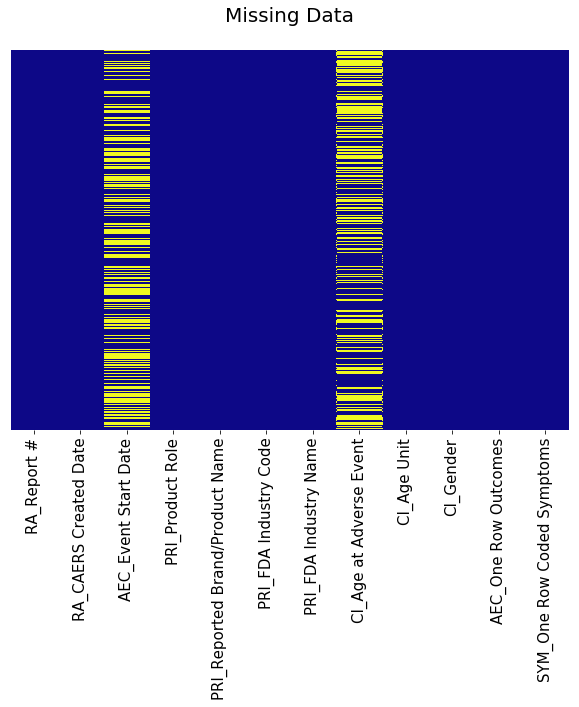

In [924]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

Just by looking at the head of the dataframe, I can tell that there is a lot of duplicate data. Let's see what we can do to remove some of that data. The 'RA_Report #' column looks like a ID column. Let's look for duplicates in that column and go from there.

In [925]:
df.duplicated('RA_Report #').value_counts()

False    64517
True     26269
dtype: int64

In [926]:
df.drop_duplicates(['RA_Report #'],keep='last',inplace=True)

In [928]:
df.duplicated('RA_Report #').value_counts()

False    64517
dtype: int64

Dropping the two columns with the most Nan Values.

In [929]:
df.drop(['AEC_Event Start Date','CI_Age at Adverse Event'],axis=1,inplace=True)

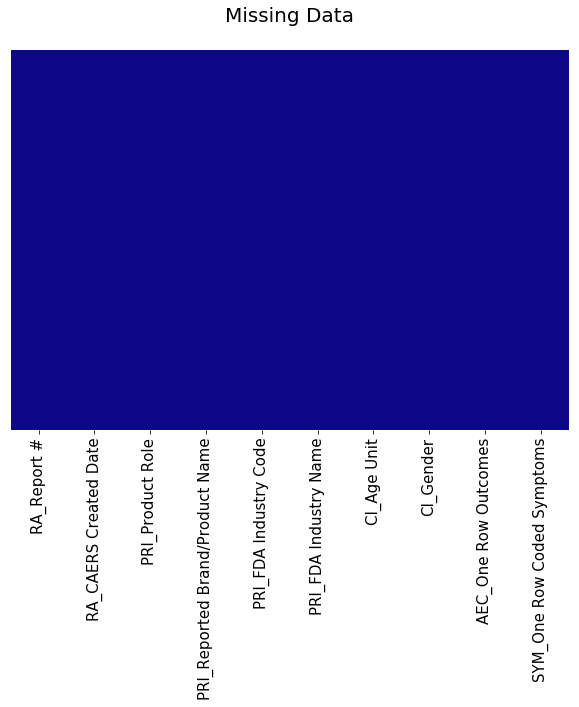

In [930]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data\n',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [933]:
df.columns

Index(['RA_Report #', 'RA_CAERS Created Date', 'PRI_Product Role',
       'PRI_Reported Brand/Product Name', 'PRI_FDA Industry Code',
       'PRI_FDA Industry Name', 'CI_Age Unit', 'CI_Gender',
       'AEC_One Row Outcomes', 'SYM_One Row Coded Symptoms'],
      dtype='object')

## Product Role

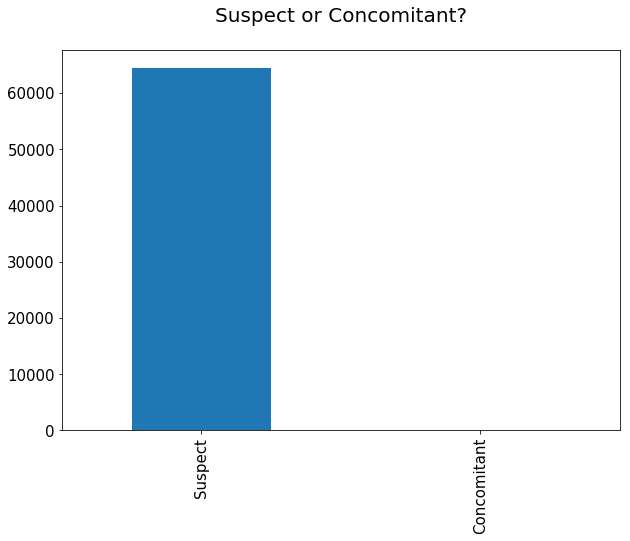

Suspect        64476
Concomitant       41
Name: PRI_Product Role, dtype: int64


In [934]:
plt.figure(figsize=(10,7))
df['PRI_Product Role'].value_counts().plot.bar()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Suspect or Concomitant?\n',fontsize=20)
plt.show()
print(df['PRI_Product Role'].value_counts())

Suspect are believed to be related to the adverse event. Concomitant are believed to be taken but not related to the adverse event. Notice all of the suspect instances.

## Gender

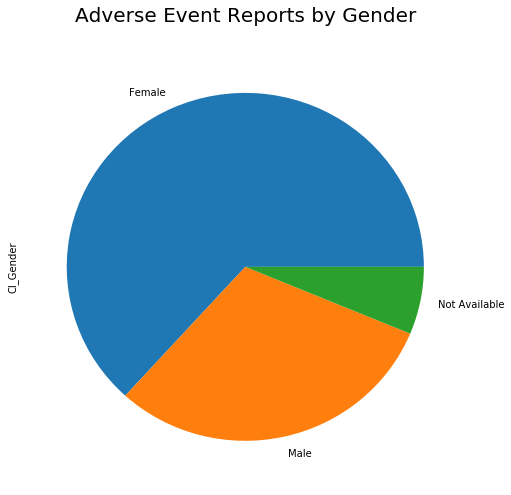

Female           40815
Male             19655
Not Available     4044
Unknown              2
Not Reported         1
Name: CI_Gender, dtype: int64


In [935]:
plt.figure(figsize=(8,8))
df['CI_Gender'].value_counts()[:3].plot(kind='pie')
plt.title('Adverse Event Reports by Gender\n',fontsize=20)
plt.show()
print(df['CI_Gender'].value_counts())

Females have around twice the likelihood of being reported to the FDA. I wonder if those reports are injuries, serious injuries or deaths? 

# Date

In [937]:
df['RA_CAERS Created Date'] = pd.to_datetime(df['RA_CAERS Created Date'])

In [938]:
type(df['RA_CAERS Created Date'][1])

pandas._libs.tslib.Timestamp

In [939]:
df['Created Year'] = df['RA_CAERS Created Date'].apply(lambda x: x.year)
df['Created Month'] = df['RA_CAERS Created Date'].apply(lambda x: x.month)

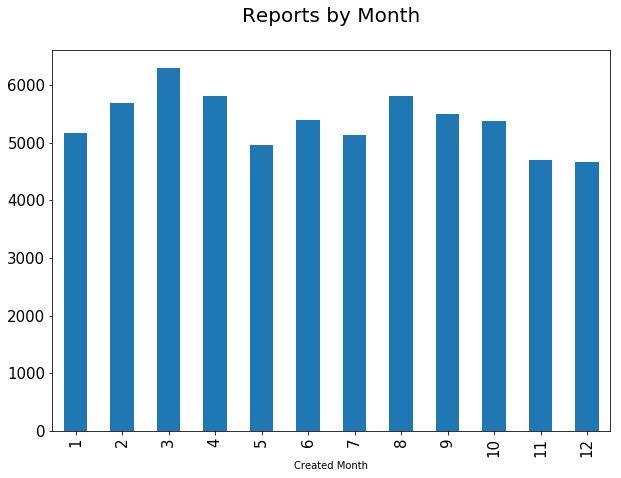

Created Month
1     5168
2     5696
3     6296
4     5807
5     4955
6     5404
7     5142
8     5815
9     5493
10    5377
11    4698
12    4666
Name: RA_CAERS Created Date, dtype: int64


In [940]:
plt.figure(figsize=(10,7))
df.groupby('Created Month').count()['RA_CAERS Created Date'].plot(kind='bar')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Reports by Month\n',fontsize=20)
plt.show()
print(df.groupby('Created Month').count()['RA_CAERS Created Date'])

Reporting seems to slow down slightly during November and December. Other than that, adverse event reporting (by the month) looks random to me.

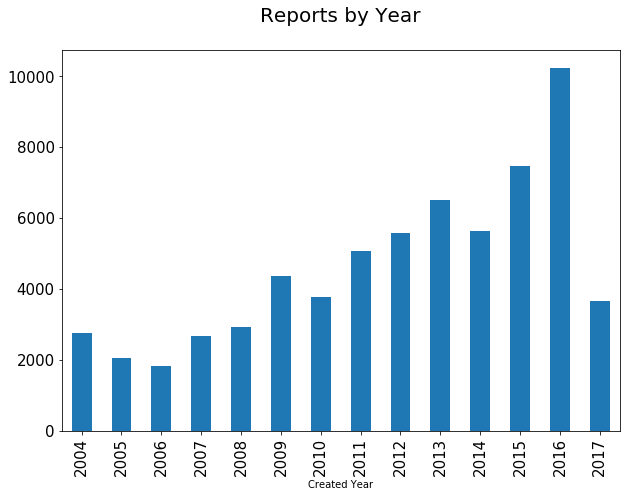

Created Year
2004     2747
2005     2048
2006     1820
2007     2662
2008     2918
2009     4369
2010     3781
2011     5081
2012     5577
2013     6523
2014     5629
2015     7481
2016    10234
2017     3647
Name: RA_CAERS Created Date, dtype: int64


In [941]:
plt.figure(figsize=(10,7))
df.groupby('Created Year').count()['RA_CAERS Created Date'].plot(kind='bar')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Reports by Year\n',fontsize=20)
plt.show()
print(df.groupby('Created Year').count()['RA_CAERS Created Date'])

Without a doubt, adverse event reporting has increased throughout the years. Are products getting more dangerous, or are people becoming more aware and reporting the effects of consumer products???

# Outcome

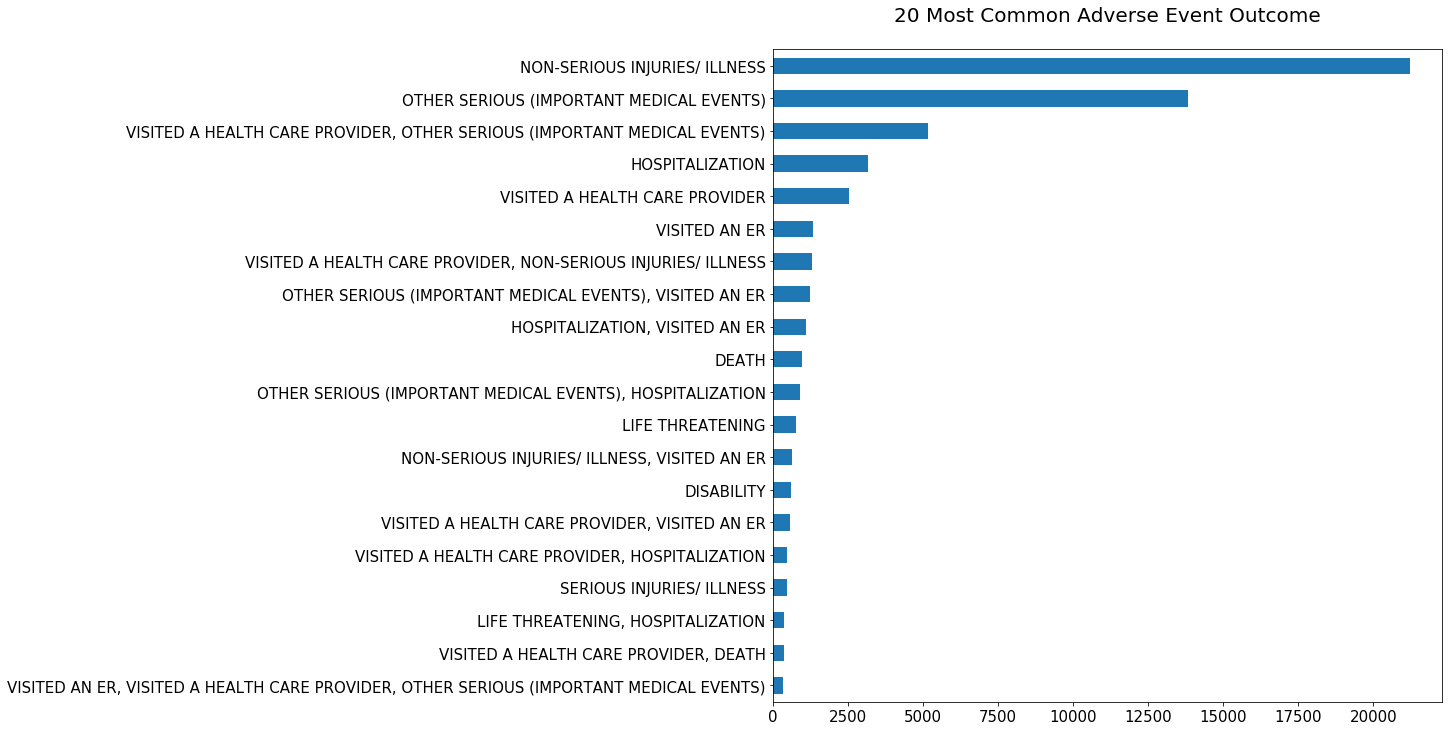


Number of different Outcomes:  298


In [942]:
plt.figure(figsize=(12,12))
df['AEC_One Row Outcomes'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('20 Most Common Adverse Event Outcome\n',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('\nNumber of different Outcomes: ',len(df['AEC_One Row Outcomes'].value_counts()))

Looking at the number of different outcomes, I believe there to be an opportunity to reorganize the values under the 'AEC_One Row Outcomes' column. For example, 'VISITED A HEALTH CARE PROVIDER, OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)' could probably be 'OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)'. Or anything with 'DEATH' in it will be renamed as just 'DEATH'. See if statement below for details. 

In [943]:
visit_count = 0
death_count = 0
non_serious = 0
serious = 0
dis_count = 0

for i in df['AEC_One Row Outcomes']:
    if 'HOSPITALIZATION' in i or 'VISITED A HEALTH CARE PROVIDER' in i or 'VISITED AN ER' in i:
        visit_count += 1
    if 'DEATH' in i:
        death_count += 1
    if 'NON-SERIOUS INJURIES/ ILLNESS' in i:
        non_serious += 1
    if  i == 'SERIOUS INJURIES/ ILLNESS' or ' SERIOUS INJURIES/ ILLNESS' in i or i[:25] == 'SERIOUS INJURIES/ ILLNESS':    
        serious += 1
    if 'DISABILITY' in i:
        dis_count += 1
        
print('PERCENTAGES OF OUTCOMES\n')        
print('VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION percentage: {}%'.format(round(visit_count/len(df),3)*100))
print('NON-SERIOUS INJURIES/ ILLNESS percentage: {}%'.format(round(non_serious/len(df),3)*100))
print('SERIOUS INJURIES/ ILLNESS percentage: {}%'.format(round(serious/len(df),2)*100))
print('DEATH percentage: {}%'.format(round(death_count/len(df),3)*100))
print('DISABILITY percentage: {}%'.format(round(dis_count/len(df),3)*100))

PERCENTAGES OF OUTCOMES

VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION percentage: 38.9%
NON-SERIOUS INJURIES/ ILLNESS percentage: 37.4%
SERIOUS INJURIES/ ILLNESS percentage: 3.0%
DEATH percentage: 2.7%
DISABILITY percentage: 2.4%


In [944]:
d = {'VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION':visit_count,
     'NON-SERIOUS INJURIES/ ILLNESS':non_serious,
     'SERIOUS INJURIES/ ILLNESS':serious,
     'DEATH':death_count,
     'DISABILITY':dis_count}

outcomesDF = pd.Series(data=d)

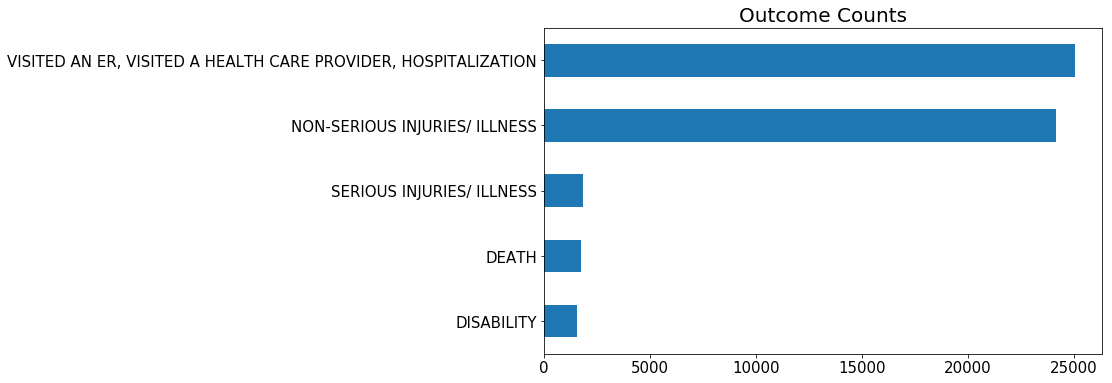

VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION    25072
NON-SERIOUS INJURIES/ ILLNESS                                     24144
SERIOUS INJURIES/ ILLNESS                                          1834
DEATH                                                              1728
DISABILITY                                                         1567
dtype: int64


In [945]:
plt.figure(figsize=(10,6))
outcomesDF.sort_values().plot(kind='barh')
plt.title('Outcome Counts',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print(outcomesDF.sort_values(ascending=False))

## Note: 

Many of these values overlapped with each other. So while on instances that read 'SERIOUS INJURY', can also say 'HOSPITALIZATION', 'DEATH' and 'DISABILITY'. An instance such as this would count four times. See below.

In [946]:
df[df['AEC_One Row Outcomes']=="DISABILITY, LIFE THREATENING, HOSPITALIZATION, DEATH"]

,RA_Report #,RA_CAERS Created Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Created Year,Created Month
2931,73591,2004-11-09,Suspect,BAUCH AND LOMB OCUVITE PRESERVISION,54,Vit/Min/Prot/Unconv Diet(Human/Animal),Year(s),Male,"DISABILITY, LIFE THREATENING, HOSPITALIZATION,...","HYPOGLYCAEMIA, LUNG NEOPLASM MALIGNANT",2004,11


# Industry

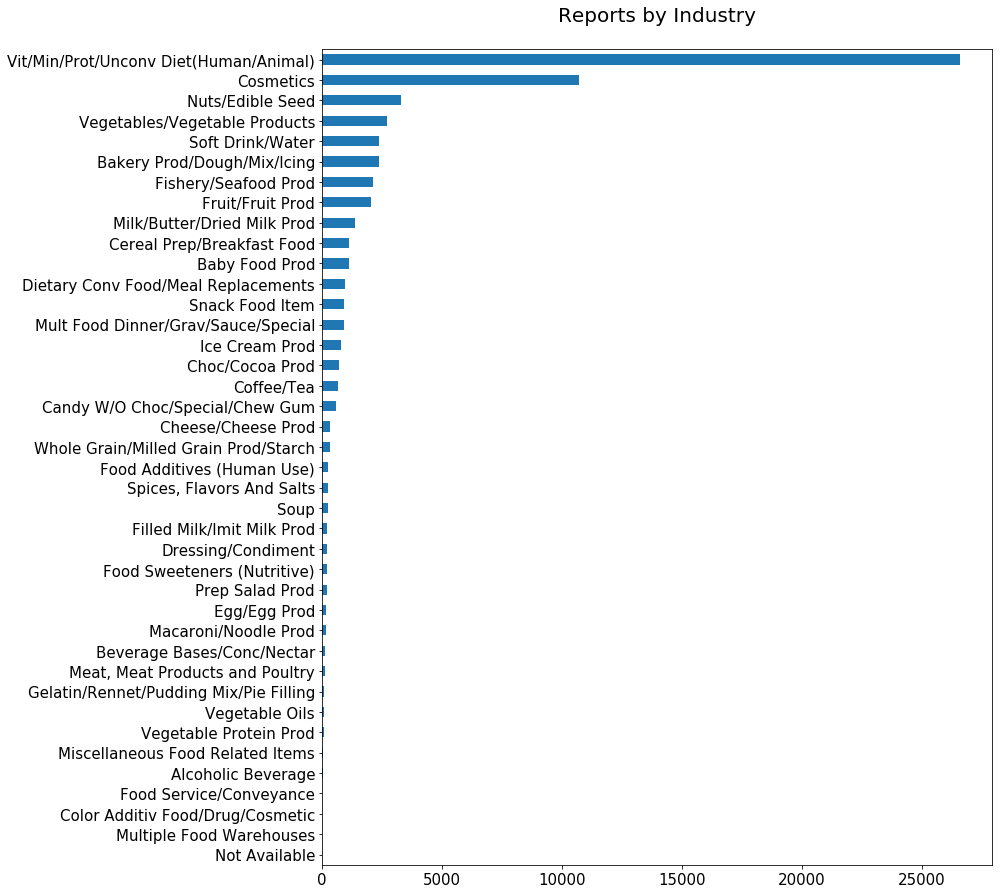

Vit/Min/Prot/Unconv Diet(Human/Animal)    26594
Cosmetics                                 10698
Nuts/Edible Seed                           3312
Vegetables/Vegetable Products              2707
Soft Drink/Water                           2380
Bakery Prod/Dough/Mix/Icing                2358
Fishery/Seafood Prod                       2116
Fruit/Fruit Prod                           2026
Milk/Butter/Dried Milk Prod                1385
Cereal Prep/Breakfast Food                 1134
Baby Food Prod                             1122
Dietary Conv Food/Meal Replacements         947
Snack Food Item                             929
Mult Food Dinner/Grav/Sauce/Special         904
Ice Cream Prod                              784
Choc/Cocoa Prod                             696
Coffee/Tea                                  683
Candy W/O Choc/Special/Chew Gum             582
Cheese/Cheese Prod                          341
Whole Grain/Milled Grain Prod/Starch        315
Food Additives (Human Use)              

In [947]:
plt.figure(figsize=(12,15))
df['PRI_FDA Industry Name'].value_counts()[:40].sort_values(ascending=True).plot(kind='barh')
plt.title('Reports by Industry\n',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print(df['PRI_FDA Industry Name'].value_counts()[:40])

# Brand

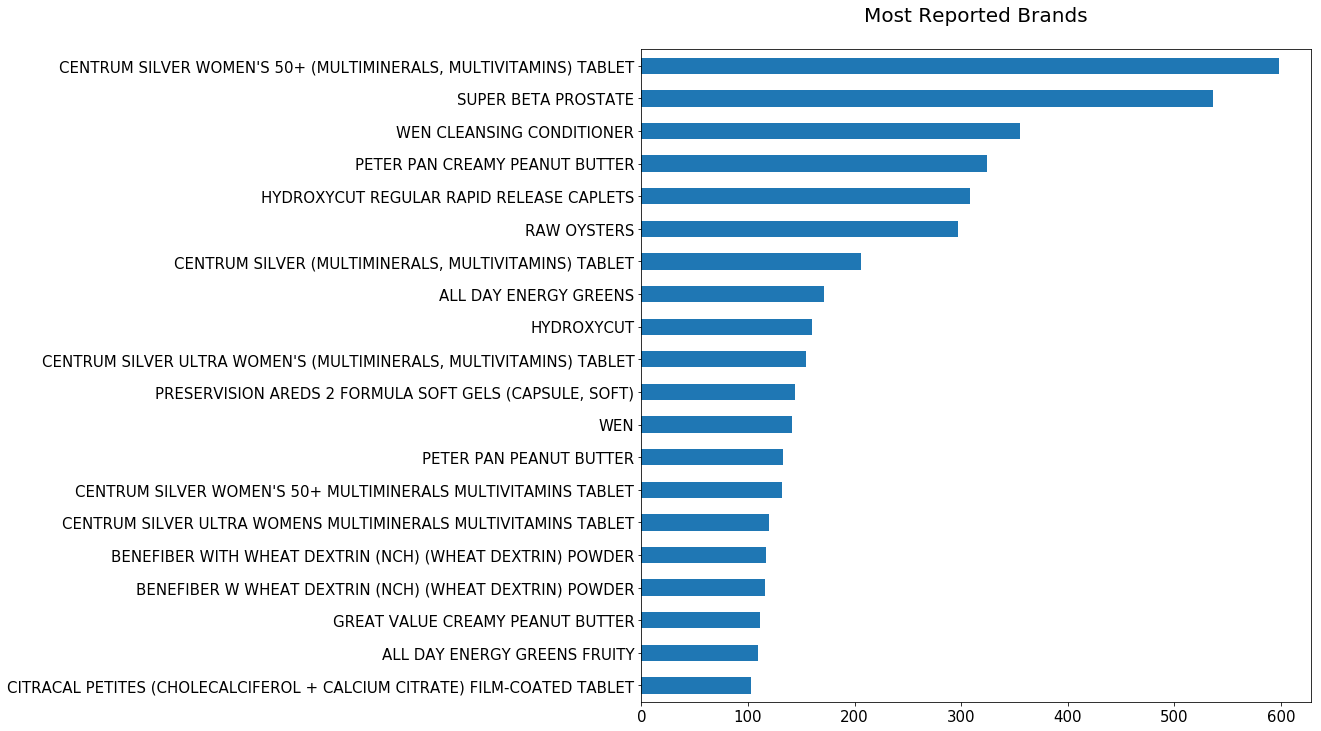

REDACTED                                                                   6078
CENTRUM SILVER WOMEN'S 50+ (MULTIMINERALS, MULTIVITAMINS) TABLET            598
SUPER BETA PROSTATE                                                         536
WEN CLEANSING CONDITIONER                                                   355
PETER PAN CREAMY PEANUT BUTTER                                              324
HYDROXYCUT REGULAR RAPID RELEASE CAPLETS                                    308
RAW OYSTERS                                                                 297
CENTRUM SILVER (MULTIMINERALS, MULTIVITAMINS) TABLET                        206
ALL DAY ENERGY GREENS                                                       171
HYDROXYCUT                                                                  160
CENTRUM SILVER ULTRA WOMEN'S (MULTIMINERALS, MULTIVITAMINS) TABLET          154
PRESERVISION AREDS 2 FORMULA SOFT GELS (CAPSULE, SOFT)                      144
WEN                                     

In [948]:
plt.figure(figsize=(12,12))
df['PRI_Reported Brand/Product Name'].value_counts()[1:21].sort_values(ascending=True).plot(kind='barh')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Most Reported Brands\n',fontsize=20)
plt.show()
print(df['PRI_Reported Brand/Product Name'].value_counts()[:21])

## REDACTED?

Notice that the brand with by far the most reports is 'REDACTED'. I have no idea what that means, but for the sake of our visualization, I removed it. 'REDACTED' has 10 times as many reports than the next highest brand.

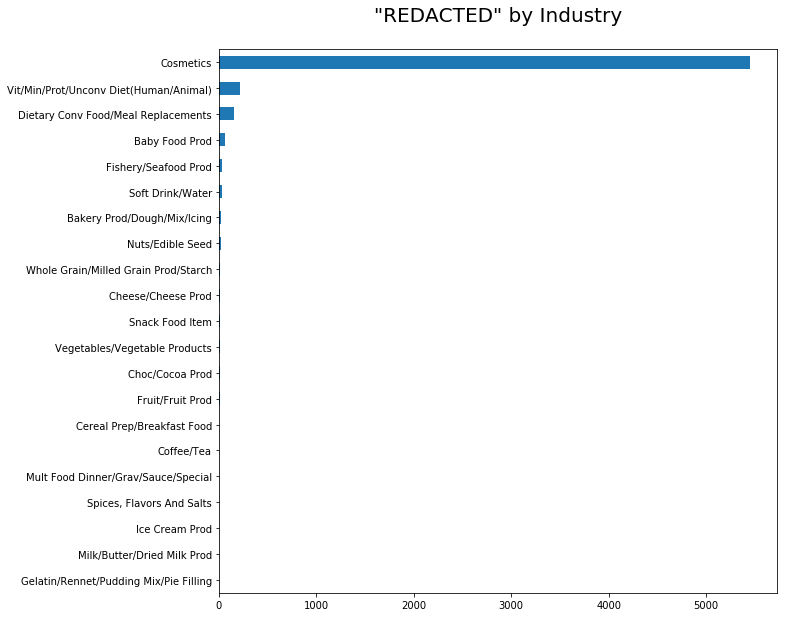

Cosmetics                                 5455
Vit/Min/Prot/Unconv Diet(Human/Animal)     221
Dietary Conv Food/Meal Replacements        158
Baby Food Prod                              61
Fishery/Seafood Prod                        32
Soft Drink/Water                            29
Bakery Prod/Dough/Mix/Icing                 25
Nuts/Edible Seed                            16
Whole Grain/Milled Grain Prod/Starch        10
Cheese/Cheese Prod                           9
Snack Food Item                              9
Vegetables/Vegetable Products                8
Choc/Cocoa Prod                              7
Fruit/Fruit Prod                             6
Cereal Prep/Breakfast Food                   5
Coffee/Tea                                   4
Mult Food Dinner/Grav/Sauce/Special          4
Spices, Flavors And Salts                    3
Ice Cream Prod                               3
Milk/Butter/Dried Milk Prod                  2
Gelatin/Rennet/Pudding Mix/Pie Filling       2
Name: PRI_FDA

In [949]:
plt.figure(figsize=(10,10))
df[df['PRI_Reported Brand/Product Name']=='REDACTED']['PRI_FDA Industry Name'].value_counts()[:21].sort_values(ascending=True).plot(kind='barh')
plt.title('"REDACTED" by Industry\n',fontsize=20)
plt.show()
print(df[df['PRI_Reported Brand/Product Name']=='REDACTED']['PRI_FDA Industry Name'].value_counts()[:21])

In [950]:
print('{}%'.format(round(5455 / len(df[df['PRI_Reported Brand/Product Name']=='REDACTED'])*100),3) + ' of the "REDACTED" instances belong to the cosmetics industry.')

90% of the "REDACTED" instances belong to the cosmetics industry.


In [951]:
redacted_df = df[df['PRI_Reported Brand/Product Name']=='REDACTED']

visit_count = 0
death_count = 0
non_serious = 0
serious = 0
dis_count = 0

for i in redacted_df['AEC_One Row Outcomes']:
    if 'HOSPITALIZATION' in i or 'VISITED A HEALTH CARE PROVIDER' in i or 'VISITED AN ER' in i:
        visit_count += 1
    if 'DEATH' in i:
        death_count += 1
    if 'NON-SERIOUS INJURIES/ ILLNESS' in i:
        non_serious += 1
    if  i == 'SERIOUS INJURIES/ ILLNESS' or ' SERIOUS INJURIES/ ILLNESS' in i or i[:25] == 'SERIOUS INJURIES/ ILLNESS':    
        serious += 1
    if 'DISABILITY' in i:
        dis_count += 1

In [952]:
redacted_dict = {'VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION':visit_count,
     'NON-SERIOUS INJURIES/ ILLNESS':non_serious,
     'SERIOUS INJURIES/ ILLNESS':serious,
     'DEATH':death_count,
     'DISABILITY':dis_count}

redacted_data = pd.Series(data=d)

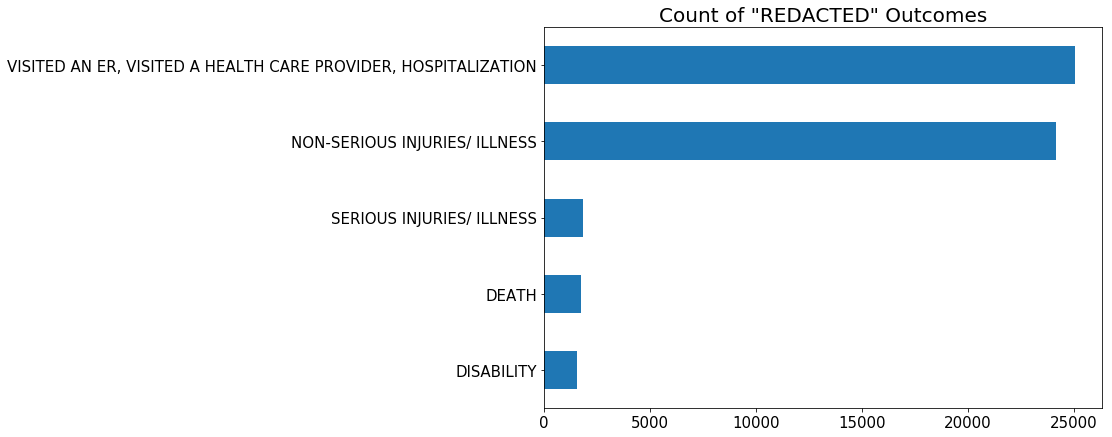

VISITED AN ER, VISITED A HEALTH CARE PROVIDER, HOSPITALIZATION    25072
NON-SERIOUS INJURIES/ ILLNESS                                     24144
SERIOUS INJURIES/ ILLNESS                                          1834
DEATH                                                              1728
DISABILITY                                                         1567
dtype: int64


In [953]:
plt.figure(figsize=(10,7))
redacted_data.sort_values().plot(kind='barh')
plt.title('Count of "REDACTED" Outcomes',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(redacted_data.sort_values(ascending=False))

In [1006]:
redacted_df[redacted_df['AEC_One Row Outcomes']=='DEATH']['SYM_One Row Coded Symptoms'].value_counts()[:10]

OVARIAN CANCER             457
DEATH                       18
MESOTHELIOMA                13
LUNG NEOPLASM MALIGNANT      5
DEATH, OVARIAN CANCER        5
OVARIAN CANCER, DEATH        5
NEOPLASM MALIGNANT           4
UTERINE CANCER               3
INJURY                       3
FALLOPIAN TUBE CANCER        2
Name: SYM_One Row Coded Symptoms, dtype: int64

Seems that the REDACTED instances have a large proportion of DEATH. I wonder what the symptoms are?

# Symptoms

In [1029]:
df['SYM_One Row Coded Symptoms'].value_counts()[:25]

OVARIAN CANCER               4499
CHOKING                      1478
DIARRHOEA                    1126
VOMITING                      947
NAUSEA                        736
DYSGEUSIA                     613
MALAISE                       568
ALOPECIA                      523
DIARRHOEA, VOMITING           513
DYSPHAGIA, CHOKING            393
HYPERSENSITIVITY              344
ABDOMINAL PAIN, DIARRHOEA     326
BURNING SENSATION             324
ABDOMINAL PAIN                304
COELIAC DISEASE               273
TOOTH INJURY                  243
VOMITING, DIARRHOEA           224
DIARRHOEA, ABDOMINAL PAIN     224
RASH                          222
HEADACHE                      216
LACERATION                    207
CHOKING, DYSPHAGIA            205
NAUSEA, VOMITING              192
CONVULSION                    191
DIARRHOEA, NAUSEA             184
Name: SYM_One Row Coded Symptoms, dtype: int64

Whoa. Ovarian cancer is a thing. We will look into this later.

In [955]:
# Drop missing values from the column. Can not loop through column otherwise.

df['SYM_One Row Coded Symptoms'].dropna(axis=0,how='any',inplace=True)

In [956]:
cancer_count = 0
choking_count = 0
diarrhoea_count = 0
vomit_count = 0
nausea_count = 0
dysgeusia_count = 0
malaise_count = 0
alopecia_count = 0
abpain_count = 0
rash_count = 0
headache_count = 0
laceration_count = 0
convulsion_count = 0
hyper_count = 0

#If you know how to make this loop more pythonic, please let me know. 

for i in df['SYM_One Row Coded Symptoms']:
    if 'CHOKING' in i:
        choking_count += 1
    if 'DIARRHOEA' in i:
        diarrhoea_count += 1
    if 'CANCER' in i:
        cancer_count += 1
    if 'VOMIT' in i:
        vomit_count += 1
    if 'NAUSEA' in i:
        nausea_count += 1
    if 'DYSGEUSIA' in i:
        dysgeusia_count += 1
    if 'MALAISE' in i:
        malaise_count += 1
    if 'ALOPECIA' in i:
        alopecia_count += 1
    if 'ABDOMINAL PAIN' in i:
        abpain_count += 1
    if 'RASH' in i:
        rash_count += 1
    if 'HEADACHE' in i:
        headache_count += 1
    if 'LACERATION' in i:
        laceration_count += 1
    if 'CONVULSION' in i:
        convulsion_count += 1
    if 'HYPERSENSITIVITY' in i:
        hyper_count += 1

In [957]:
symptoms_dict = {
 'ABDOMINAL PAIN': abpain_count,
 'ALOPECIA': alopecia_count,
 'CHOKING': choking_count,
 'CONVULSION': convulsion_count,
 'DIARRHOEA': diarrhoea_count,
 'DYSGEUSIA': dysgeusia_count,
 'HEADACHE': headache_count,
 'HYPERSENSITIVITY': hyper_count,
 'LACERATION': laceration_count,
 'MALAISE': malaise_count,
 'NAUSEA': nausea_count,
 'CANCER': cancer_count,
 'RASH': rash_count,
 'VOMITING': vomit_count
}

for k,v in symptoms_dict.items():
    print(k + ': ',v)

ABDOMINAL PAIN:  9495
ALOPECIA:  1738
CHOKING:  4532
CONVULSION:  714
DIARRHOEA:  12301
DYSGEUSIA:  1550
HEADACHE:  3954
HYPERSENSITIVITY:  3595
LACERATION:  422
MALAISE:  4910
NAUSEA:  8671
CANCER:  5142
RASH:  2905
VOMITING:  10362


In [958]:
symptom_df = pd.Series(symptoms_dict)

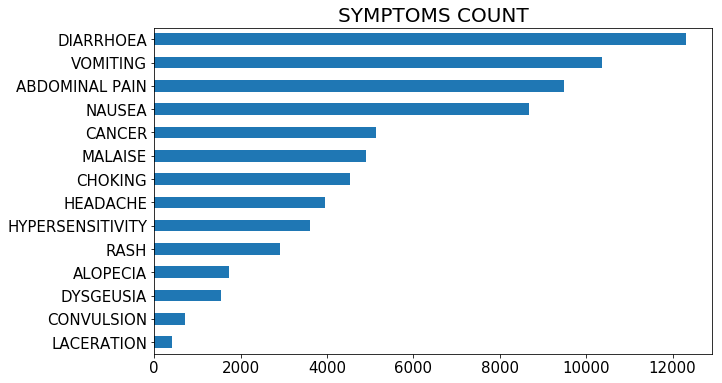

DIARRHOEA           12301
VOMITING            10362
ABDOMINAL PAIN       9495
NAUSEA               8671
CANCER               5142
MALAISE              4910
CHOKING              4532
HEADACHE             3954
HYPERSENSITIVITY     3595
RASH                 2905
ALOPECIA             1738
DYSGEUSIA            1550
CONVULSION            714
LACERATION            422
dtype: int64


In [959]:
plt.figure(figsize=(10,6))
symptom_df.sort_values(ascending=True).plot(kind='barh')
plt.title('SYMPTOMS COUNT',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print(symptom_df.sort_values(ascending=False))

It is very hard for me to imagine cancer as more common as an adverse event than headaches, rashes and choking. How does the REDACTED dataframe's column for symptoms look?

# Outcome by Industry

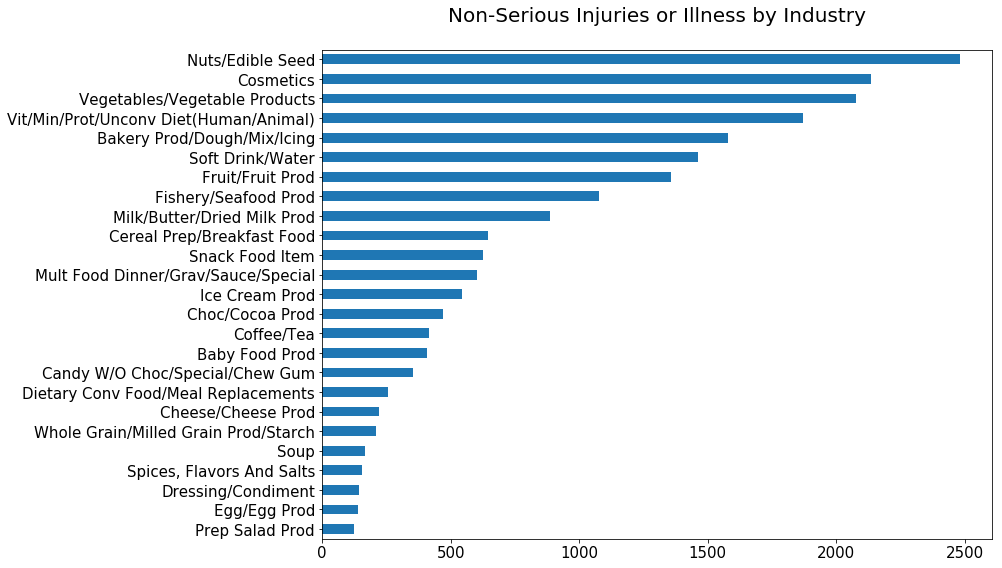

Nuts/Edible Seed                          2480
Cosmetics                                 2133
Vegetables/Vegetable Products             2076
Vit/Min/Prot/Unconv Diet(Human/Animal)    1869
Bakery Prod/Dough/Mix/Icing               1580
Soft Drink/Water                          1461
Fruit/Fruit Prod                          1355
Fishery/Seafood Prod                      1077
Milk/Butter/Dried Milk Prod                886
Cereal Prep/Breakfast Food                 645
Snack Food Item                            625
Mult Food Dinner/Grav/Sauce/Special        604
Ice Cream Prod                             543
Choc/Cocoa Prod                            469
Coffee/Tea                                 416
Baby Food Prod                             407
Candy W/O Choc/Special/Chew Gum            355
Dietary Conv Food/Meal Replacements        258
Cheese/Cheese Prod                         222
Whole Grain/Milled Grain Prod/Starch       211
Soup                                       167
Spices, Flavo

In [960]:
plt.figure(figsize=(12,9))
df[df['AEC_One Row Outcomes']=='NON-SERIOUS INJURIES/ ILLNESS']['PRI_FDA Industry Name'].value_counts()[:25].sort_values(ascending=True).plot(kind='barh')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Non-Serious Injuries or Illness by Industry\n',fontsize=20)
plt.show()
print(df[df['AEC_One Row Outcomes']=='NON-SERIOUS INJURIES/ ILLNESS']['PRI_FDA Industry Name'].value_counts()[:25])

For non serious adverse events, Nuts and Seeds, Cosmetics, Vegetables and Vit/Min products produced the most instances.

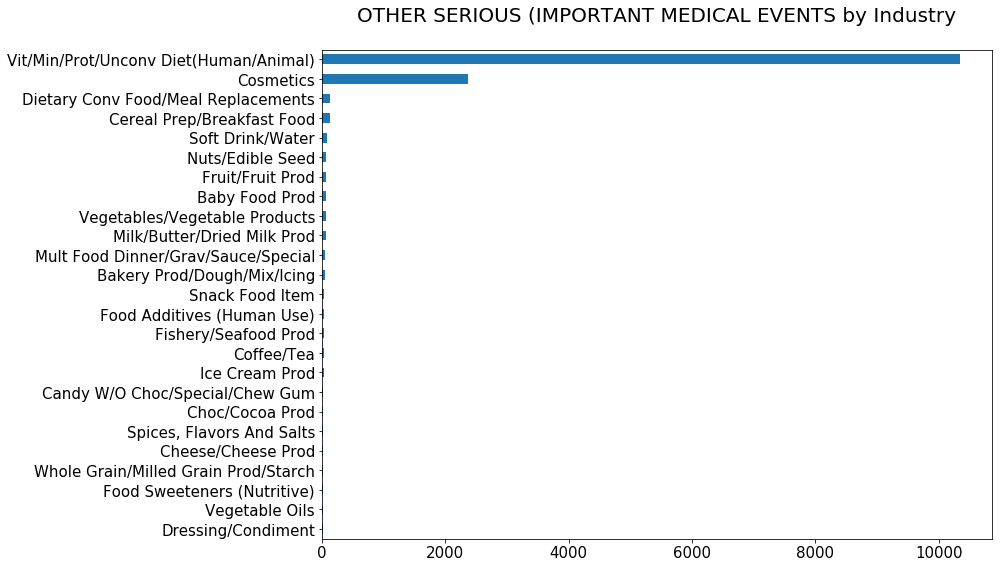

Vit/Min/Prot/Unconv Diet(Human/Animal)    10343
Cosmetics                                  2374
Dietary Conv Food/Meal Replacements         136
Cereal Prep/Breakfast Food                  123
Soft Drink/Water                             72
Nuts/Edible Seed                             68
Fruit/Fruit Prod                             67
Baby Food Prod                               65
Vegetables/Vegetable Products                64
Milk/Butter/Dried Milk Prod                  57
Mult Food Dinner/Grav/Sauce/Special          53
Bakery Prod/Dough/Mix/Icing                  48
Snack Food Item                              39
Food Additives (Human Use)                   38
Fishery/Seafood Prod                         37
Coffee/Tea                                   29
Ice Cream Prod                               26
Candy W/O Choc/Special/Chew Gum              23
Choc/Cocoa Prod                              22
Spices, Flavors And Salts                    21
Cheese/Cheese Prod                      

In [961]:
plt.figure(figsize=(12,9))
df[df['AEC_One Row Outcomes']=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']['PRI_FDA Industry Name'].value_counts()[:25].sort_values(ascending=True).plot(kind='barh')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('OTHER SERIOUS (IMPORTANT MEDICAL EVENTS by Industry\n',fontsize=20)
plt.show()
print(df[df['AEC_One Row Outcomes']=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']['PRI_FDA Industry Name'].value_counts()[:25])

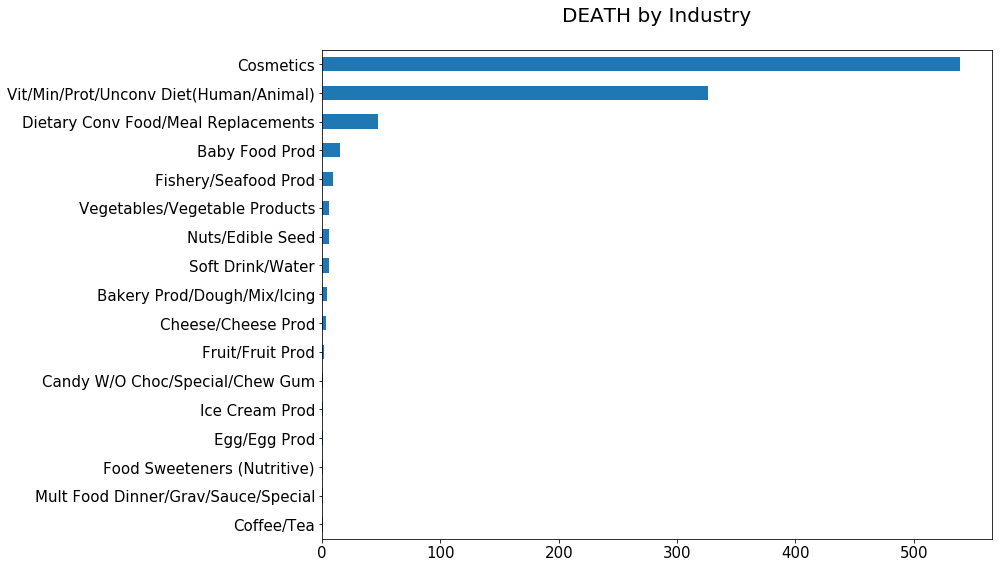

Cosmetics                                 539
Vit/Min/Prot/Unconv Diet(Human/Animal)    326
Dietary Conv Food/Meal Replacements        47
Baby Food Prod                             15
Fishery/Seafood Prod                        9
Nuts/Edible Seed                            6
Soft Drink/Water                            6
Vegetables/Vegetable Products               6
Bakery Prod/Dough/Mix/Icing                 4
Cheese/Cheese Prod                          3
Fruit/Fruit Prod                            2
Ice Cream Prod                              1
Egg/Egg Prod                                1
Food Sweeteners (Nutritive)                 1
Mult Food Dinner/Grav/Sauce/Special         1
Candy W/O Choc/Special/Chew Gum             1
Coffee/Tea                                  1
Name: PRI_FDA Industry Name, dtype: int64


In [962]:
plt.figure(figsize=(12,9))
df[df['AEC_One Row Outcomes']=='DEATH']['PRI_FDA Industry Name'].value_counts()[:25].sort_values(ascending=True).plot(kind='barh')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('DEATH by Industry\n',fontsize=20)
plt.show()
print(df[df['AEC_One Row Outcomes']=='DEATH']['PRI_FDA Industry Name'].value_counts()[:25])

# Outcome by Gender

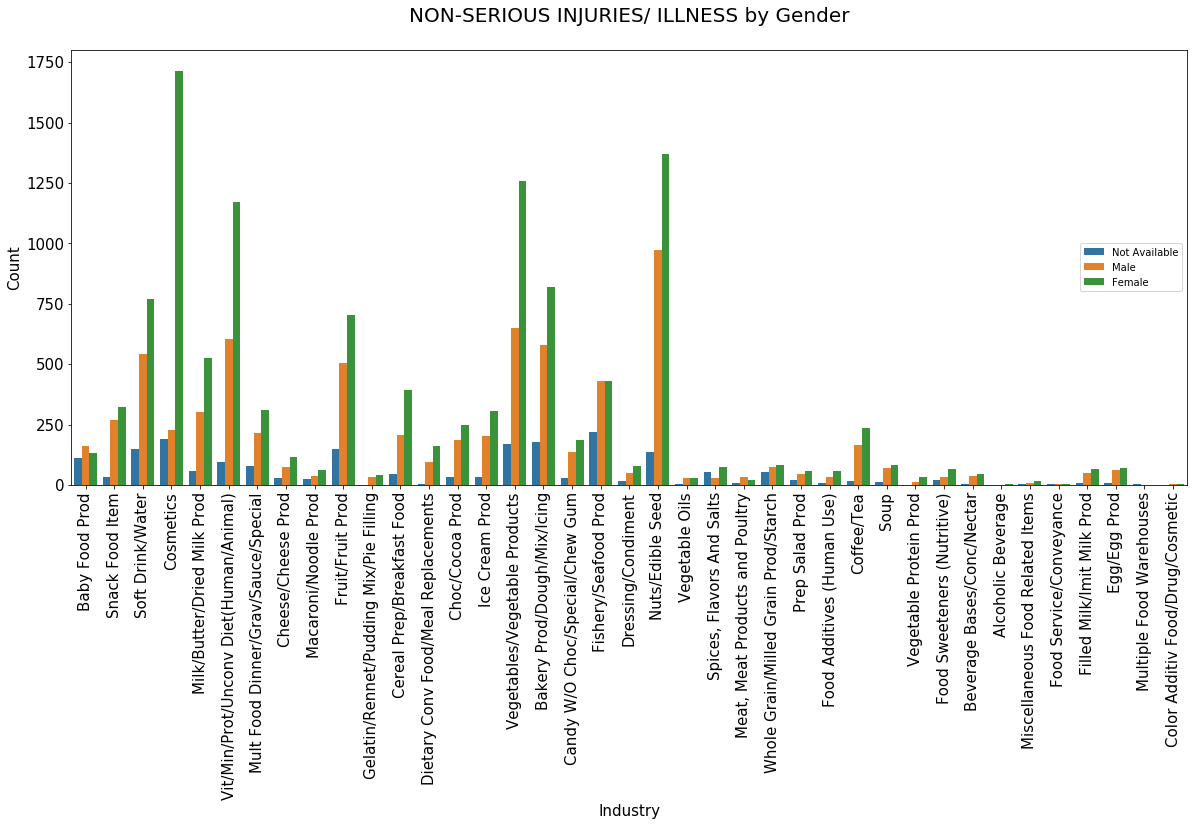

Reported Male Non Serious Injuries: 7163
Reported Female Non Serious Injuries: 12072


In [963]:
injury = df[df['AEC_One Row Outcomes']=='NON-SERIOUS INJURIES/ ILLNESS']

plt.figure(figsize=(20,8))
sns.countplot(injury['PRI_FDA Industry Name'],hue=injury['CI_Gender'])
plt.title('NON-SERIOUS INJURIES/ ILLNESS by Gender\n',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Industry',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=7)
plt.show()
print('Reported Male Non Serious Injuries: ' + str(len(df[(df['CI_Gender']=='Male')&(df['AEC_One Row Outcomes']=='NON-SERIOUS INJURIES/ ILLNESS')]['PRI_FDA Industry Name'])))
print('Reported Female Non Serious Injuries: ' + str(len(df[(df['CI_Gender']=='Female')&(df['AEC_One Row Outcomes']=='NON-SERIOUS INJURIES/ ILLNESS')]['PRI_FDA Industry Name'])))

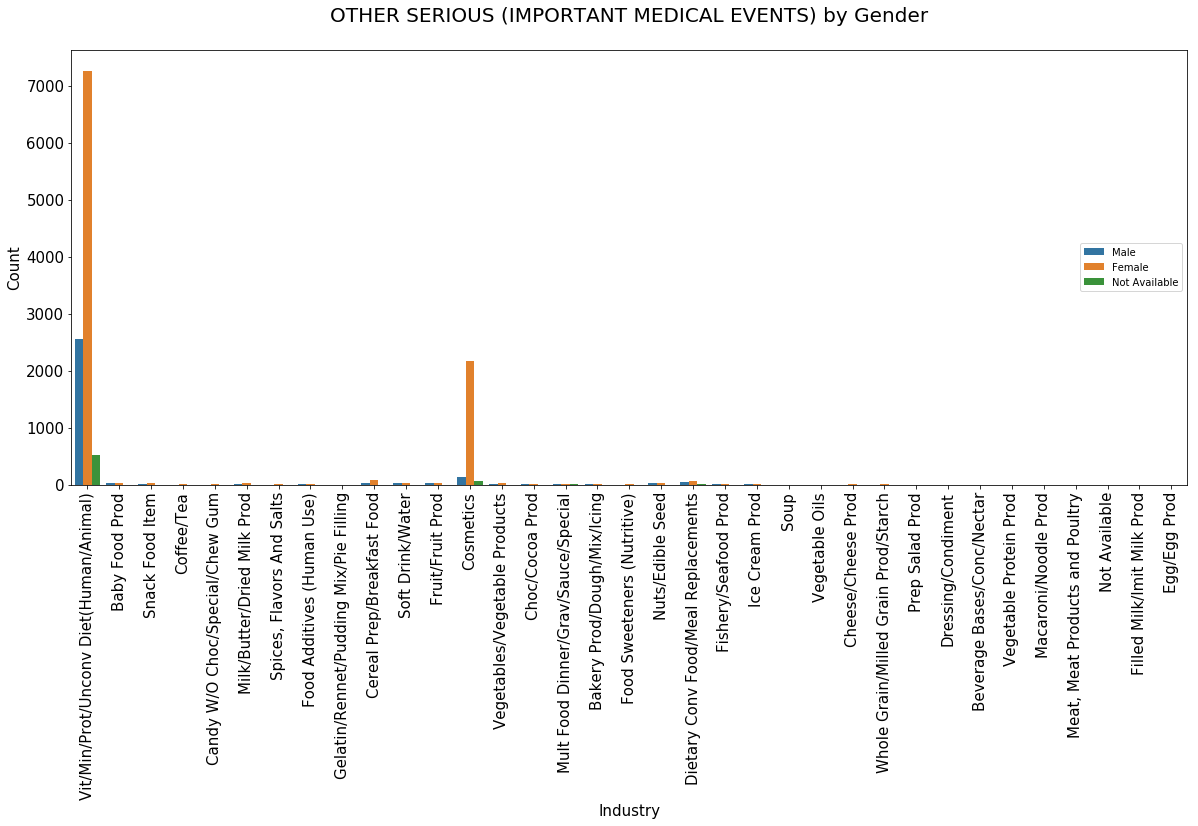

Reported Male Serious Injuries: 3070
Reported Female Serious Injuries: 10064


In [964]:
serious = df[df['AEC_One Row Outcomes']=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']

plt.figure(figsize=(20,8))
sns.countplot(serious['PRI_FDA Industry Name'],hue=serious['CI_Gender'])
plt.title('OTHER SERIOUS (IMPORTANT MEDICAL EVENTS) by Gender\n',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Industry',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=7)
plt.show()
print('Reported Male Serious Injuries: ' + str(len(df[(df['CI_Gender']=='Male')&(df['AEC_One Row Outcomes']=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)')]['PRI_FDA Industry Name'])))
print('Reported Female Serious Injuries: ' + str(len(df[(df['CI_Gender']=='Female')&(df['AEC_One Row Outcomes']=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)')]['PRI_FDA Industry Name'])))

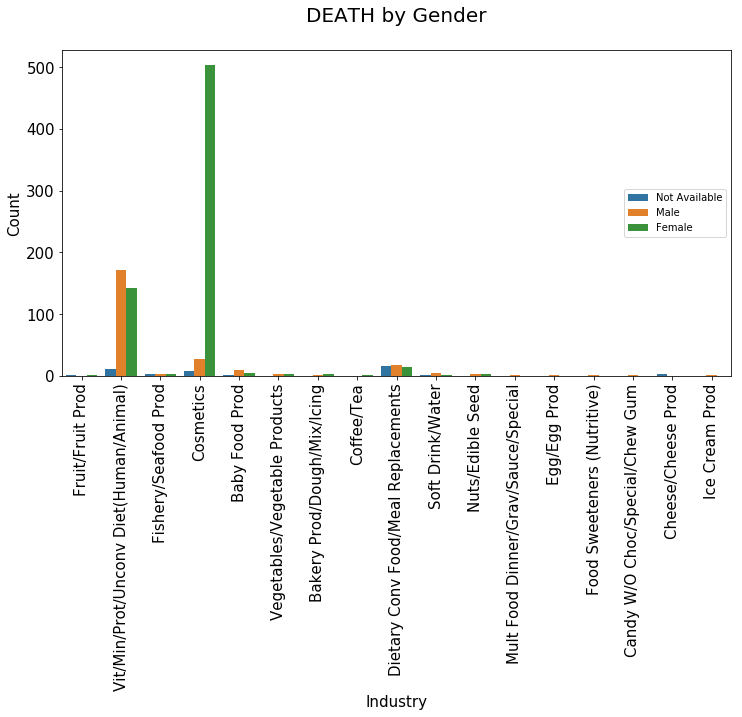

Reported Male Deaths: 244
Reported Female Deaths: 679


In [965]:
death = df[df['AEC_One Row Outcomes']=='DEATH']

plt.figure(figsize=(12,6))
sns.countplot(death['PRI_FDA Industry Name'],hue=death['CI_Gender'])
plt.title('DEATH by Gender\n',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Industry',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=7)
plt.show()
print('Reported Male Deaths: ' + str(len(df[(df['CI_Gender']=='Male')&(df['AEC_One Row Outcomes']=='DEATH')]['PRI_FDA Industry Name'])))
print('Reported Female Deaths: ' + str(len(df[(df['CI_Gender']=='Female')&(df['AEC_One Row Outcomes']=='DEATH')]['PRI_FDA Industry Name'])))

Ouch. Females outpace males in Non Serious Injury, Serious Injury and Death in Adverse Event Reporting by a large margin. Is this because women are more likely to report an adverse event or that women actually suffer from more adverse events?

# Ovarian Cancer

In [1028]:
df['SYM_One Row Coded Symptoms'].value_counts()[:20]

OVARIAN CANCER               4499
CHOKING                      1478
DIARRHOEA                    1126
VOMITING                      947
NAUSEA                        736
DYSGEUSIA                     613
MALAISE                       568
ALOPECIA                      523
DIARRHOEA, VOMITING           513
DYSPHAGIA, CHOKING            393
HYPERSENSITIVITY              344
ABDOMINAL PAIN, DIARRHOEA     326
BURNING SENSATION             324
ABDOMINAL PAIN                304
COELIAC DISEASE               273
TOOTH INJURY                  243
VOMITING, DIARRHOEA           224
DIARRHOEA, ABDOMINAL PAIN     224
RASH                          222
HEADACHE                      216
Name: SYM_One Row Coded Symptoms, dtype: int64

In [966]:
death = df[df['AEC_One Row Outcomes']=='DEATH']
death['SYM_One Row Coded Symptoms'].value_counts()[:20]

OVARIAN CANCER                  462
DEATH                           153
MESOTHELIOMA                     13
NEOPLASM MALIGNANT               13
COMPLETED SUICIDE                13
MYOCARDIAL INFARCTION            10
DEATH, OVARIAN CANCER             6
LUNG NEOPLASM MALIGNANT           6
OVARIAN CANCER, DEATH             5
CARDIAC ARREST                    5
CEREBROVASCULAR ACCIDENT          4
OVERDOSE                          4
ARRHYTHMIA                        3
MYOCARDIAL INFARCTION, DEATH      3
INTRACRANIAL ANEURYSM             3
UTERINE CANCER                    3
CARDIAC DISORDER                  3
INJURY                            3
PNEUMONIA                         2
NECROTISING COLITIS               2
Name: SYM_One Row Coded Symptoms, dtype: int64

In [967]:
ovarian = 0
for i in death['SYM_One Row Coded Symptoms']:
    if 'OVARIAN CANCER' in i:
        ovarian += 1

In [1020]:
print('{}%'.format(round(ovarian/len(death)*100),3) + ' of the symptoms in the "DEATH" dataframe had the term "OVERIAN CANCER" in it.')

50% of the symptoms in the "DEATH" dataframe had the term "OVERIAN CANCER" in it.


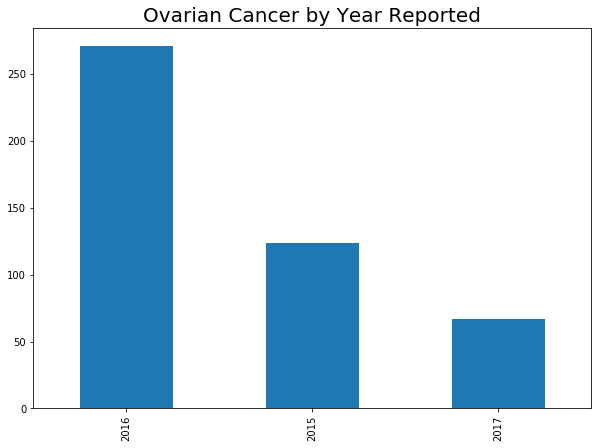

2016    271
2015    124
2017     67
Name: Created Year, dtype: int64


In [976]:
plt.figure(figsize=(10,7))
death[death['SYM_One Row Coded Symptoms']=='OVARIAN CANCER']['Created Year'].value_counts().plot(kind='bar')
plt.title('Ovarian Cancer by Year Reported',fontsize=20)
plt.show()
print(death[death['SYM_One Row Coded Symptoms']=='OVARIAN CANCER']['Created Year'].value_counts())

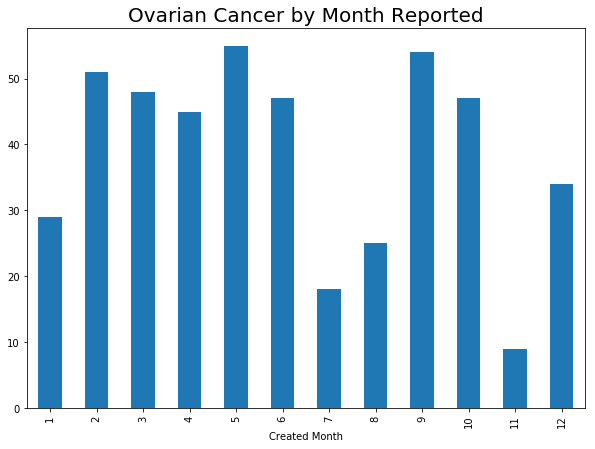

Created Month  Created Month
1              1                 65
2              2                 84
3              3                102
4              4                 90
5              5                 86
6              6                120
7              7                 47
8              8                 74
9              9                 95
10             10                92
11             11                46
12             12                68
Name: Created Month, dtype: int64


In [1012]:
ovarian_death = death[death['SYM_One Row Coded Symptoms']=='OVARIAN CANCER']

plt.figure(figsize=(10,7))
ovarian_death.groupby('Created Month').count()['RA_Report #'].plot(kind='bar')
plt.title('Ovarian Cancer by Month Reported',fontsize=20)
plt.show()
print(death.groupby('Created Month')['Created Month'].value_counts())

In [1014]:
ovarian_death['PRI_FDA Industry Name'].value_counts()

Cosmetics    462
Name: PRI_FDA Industry Name, dtype: int64

This is pretty big! ALL of the instances of "OVARIAN DEATH" come from the Cosmetic industry. 

In [1015]:
ovarian_death['PRI_Reported Brand/Product Name'].value_counts()

REDACTED                            457
SHOWER TO SHOWER POWDER               4
SHOWER TO SHOWER POWDER (POWDER)      1
Name: PRI_Reported Brand/Product Name, dtype: int64

# Adverse Events or Adverse Reporting?

After looking at the overian_death dataframe, I noticed some funky behavior and reporting. For example let's look at the dates '2015-01-28' and '2017-02-27'. 

In [1035]:
ovarian_death[ovarian_death['RA_CAERS Created Date']=='2015-01-28']

,RA_Report #,RA_CAERS Created Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Created Year,Created Month
59369,182212,2015-01-28,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2015,1
59371,182214,2015-01-28,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2015,1
59381,182224,2015-01-28,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2015,1
59382,182225,2015-01-28,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2015,1
59383,182226,2015-01-28,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2015,1


In [1036]:
ovarian_death[ovarian_death['RA_CAERS Created Date']=='2017-02-27']

,RA_Report #,RA_CAERS Created Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Created Year,Created Month
88313,208135,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88336,208151,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88337,208152,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88343,208158,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88344,208159,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88350,208166,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88356,208172,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88358,208174,2017-02-27,Suspect,REDACTED,53,Cosmetics,Year(s),Female,DEATH,OVARIAN CANCER,2017,2
88359,208175,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2
88360,208176,2017-02-27,Suspect,REDACTED,53,Cosmetics,Not Available,Female,DEATH,OVARIAN CANCER,2017,2


On '2015-01-28', there were 5 instances of the exact same report (with the exception of the 'RA_Report #'). On '2017-02-27', there were 13 instances of nearly the exact same report (with the exception of the 'RA_Report #'). Maybe my intuition is a bit off, but this reporting looks a little off.

Unfortunately, the brand column does not provide much insight. Most of the results come back as REDACTED, whatever that means. Furthermore, I do not believe we have enough information to totally blame the cosmetics industry for the instances of ovarian cancer. 

## Feedback is massively appreciated! Thank you!